Accion suavizadora del operador de Laplace


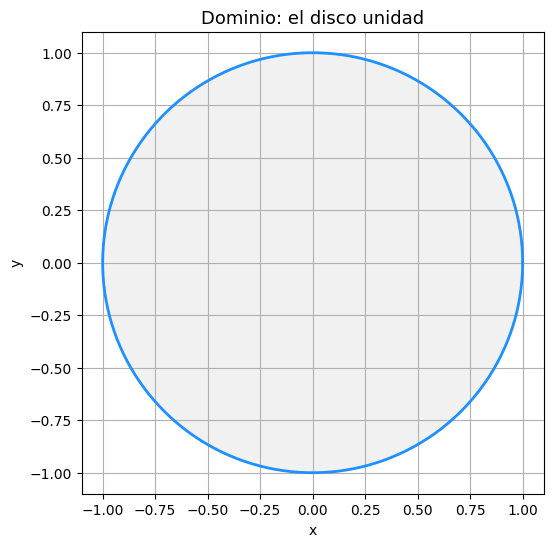

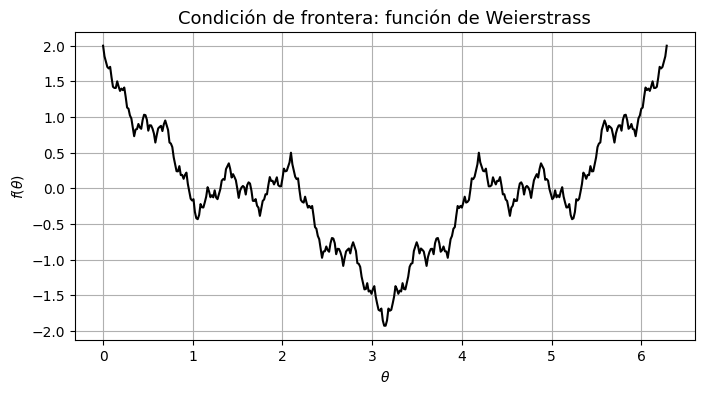

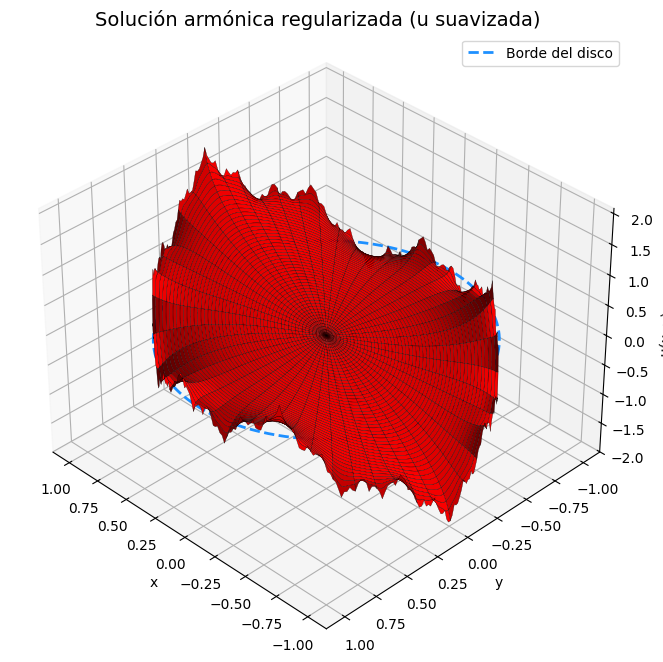

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
a = 0.5
b = 3
N = 30  # términos de la serie
res = 400

# Variables angulares y polares
theta_vals = np.linspace(0, 2*np.pi, res)
r_vals = np.linspace(0, 1, res)
R, Theta = np.meshgrid(r_vals, theta_vals)

# Función de Weierstrass en la frontera
def weierstrass(theta, a, b, N):
    return sum(a**n * np.cos(b**n * theta) for n in range(N))

f_theta = weierstrass(theta_vals, a, b, N)

# Solución armónica interior (regularizada)
U = np.zeros_like(R)
for n in range(N):
    U += a**n * R**(b**n) * np.cos(b**n * Theta)

# Coordenadas cartesianas
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Coordenadas del borde del disco
circle_theta = np.linspace(0, 2*np.pi, 500)
circle_x = np.cos(circle_theta)
circle_y = np.sin(circle_theta)

# ----------------- FIGURA 1: El disco en 2D -----------------
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.set_aspect('equal')
ax1.plot(circle_x, circle_y, color='dodgerblue', linewidth=2)
ax1.fill(circle_x, circle_y, color='lightgray', alpha=0.3)
ax1.set_title("Dominio: el disco unidad", fontsize=13)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True)
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)

# ----------------- FIGURA 2: Función de Weierstrass -----------------
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(theta_vals, f_theta, color='black')
ax2.set_title("Condición de frontera: función de Weierstrass", fontsize=13)
ax2.set_xlabel(r"$\theta$")
ax2.set_ylabel(r"$f(\theta)$")
ax2.grid(True)

# ----------------- FIGURA 3: Solución armónica u(x, y) en 3D -----------------
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')

# Superficie con líneas de rejilla visibles
ax3.plot_surface(X, Y, U, color='red', edgecolor='k', linewidth=0.2, antialiased=True)

# Contorno del disco (z = 0)
ax3.plot(circle_x, circle_y, np.zeros_like(circle_x), color='dodgerblue', linestyle='--', linewidth=2, label="Borde del disco")

# Estética
ax3.set_title("Solución armónica regularizada (u suavizada)", fontsize=14)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("u(x, y)")
ax3.view_init(elev=35, azim=135)
ax3.legend()

plt.show()


Poisson en placa rectangular con CF constante en el borde superior 

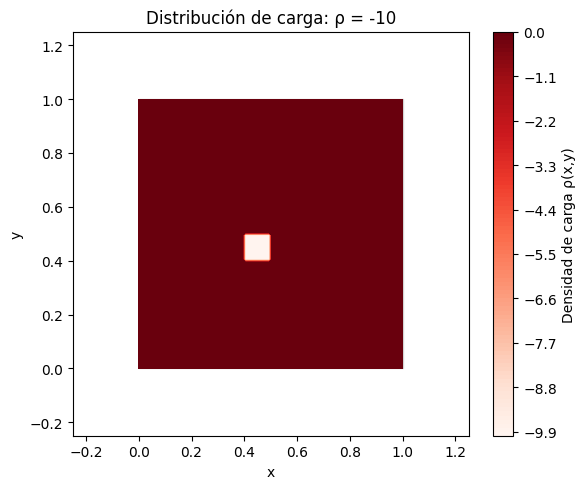

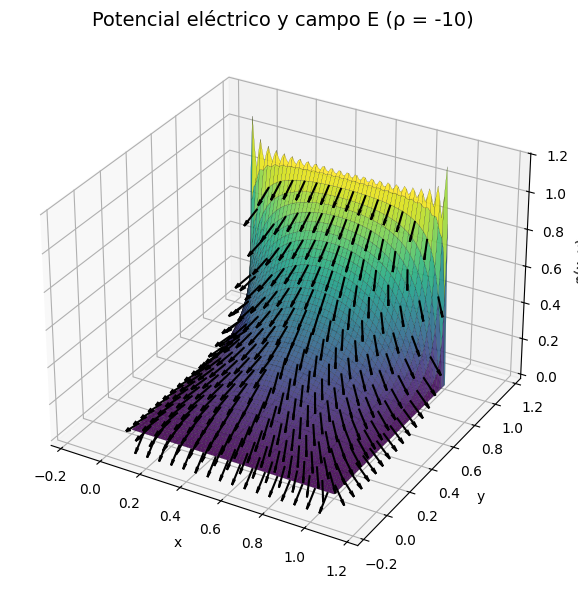

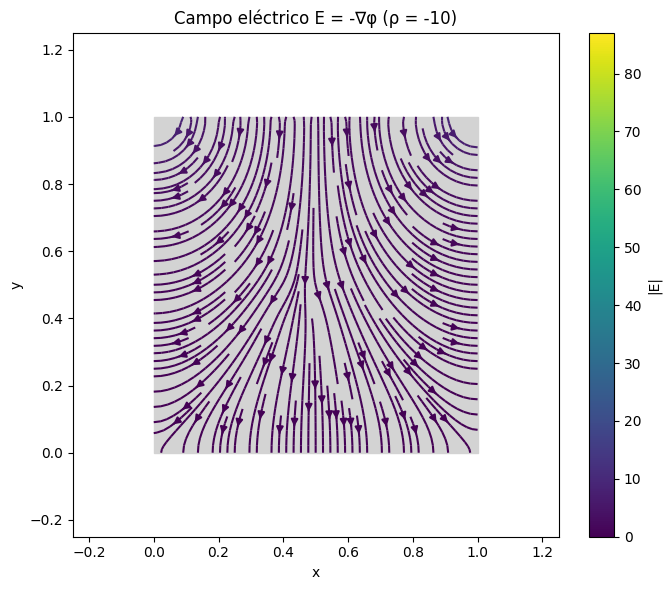

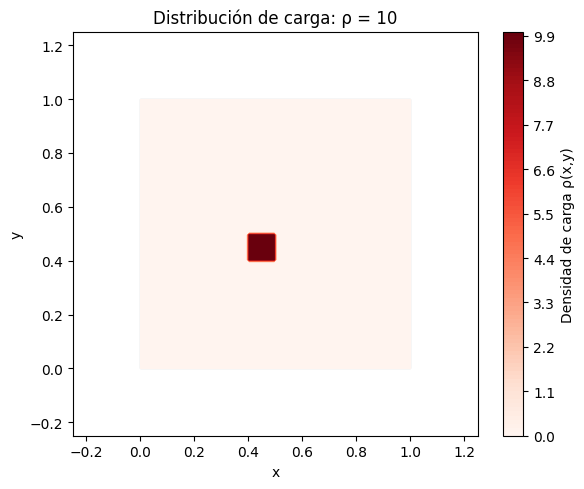

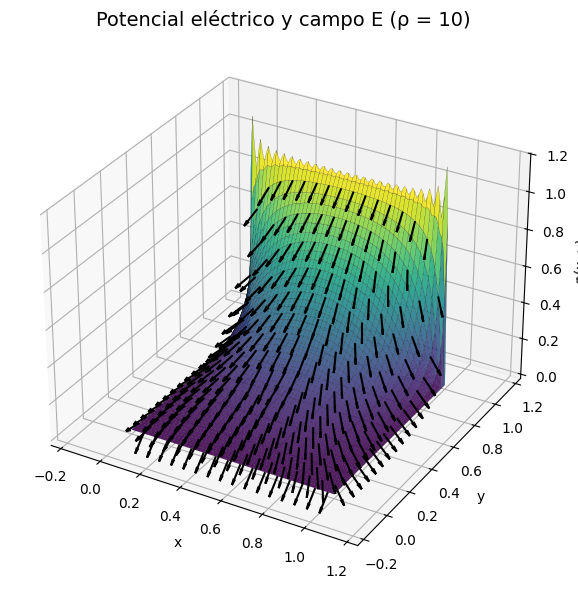

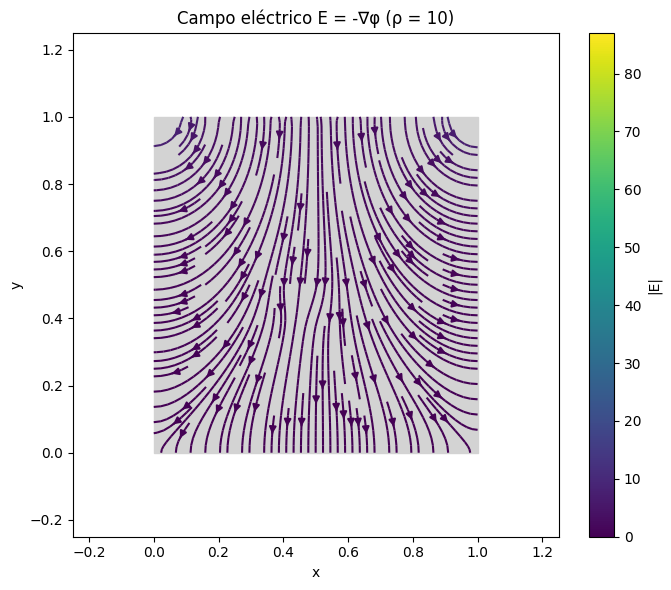

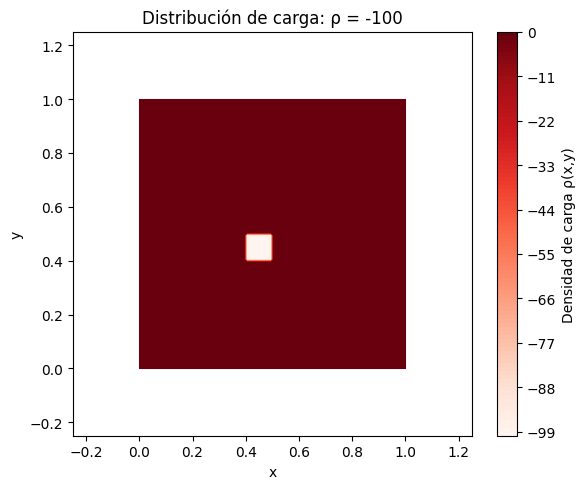

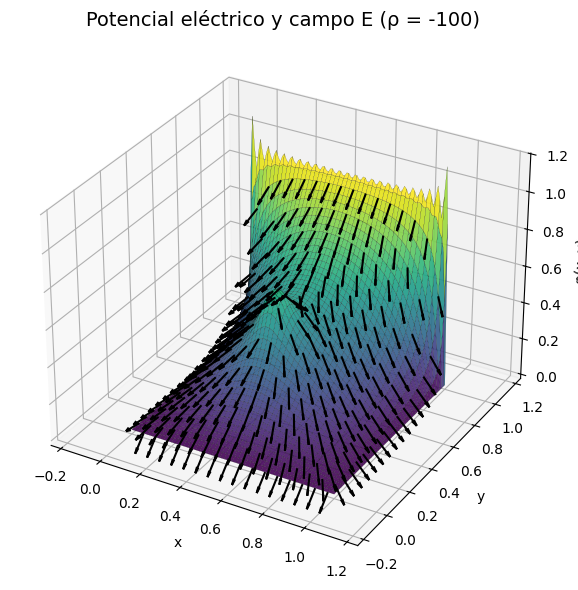

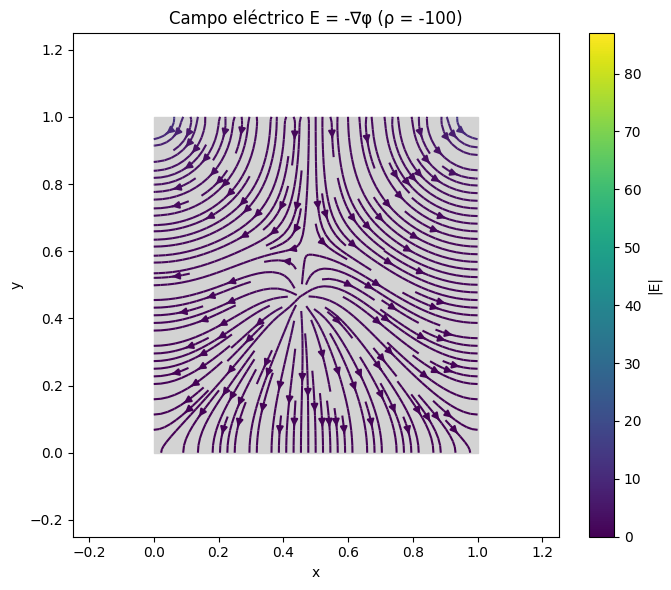

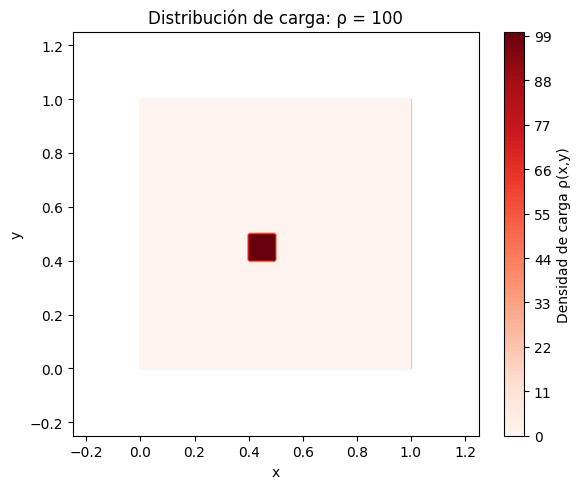

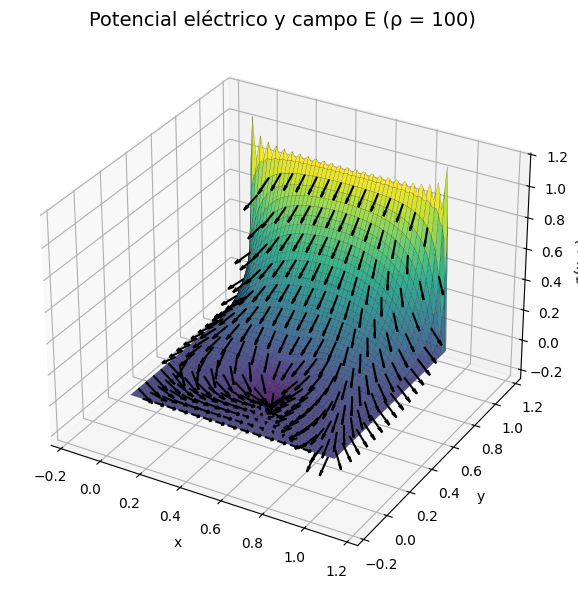

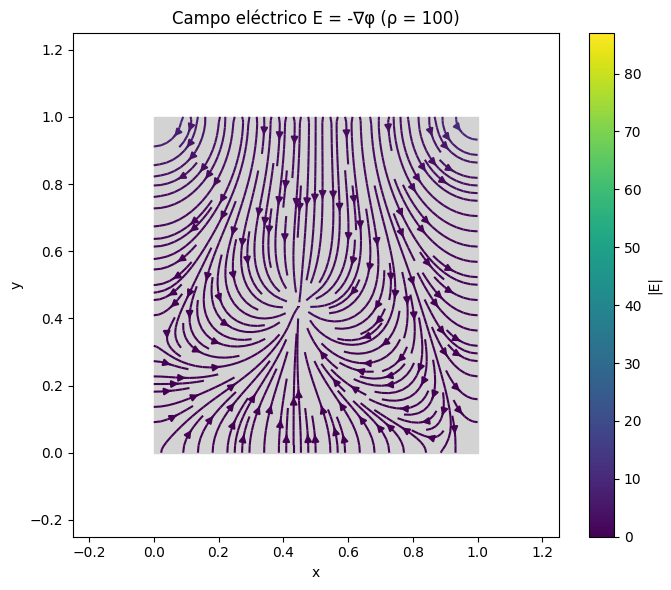

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, patches

a = 1.0
b = 1.0
Nx = 100
Ny = 100
x = np.linspace(0, a, Nx)
y = np.linspace(0, b, Ny)
X, Y = np.meshgrid(x, y)

V0 = 1.0
N_terms = 50
cargas = [-10, 10, -100, 100]

for valor in cargas:
    rho = np.zeros_like(X)
    rho[(Y > 0.4) & (Y < 0.5) & (X > 0.4) & (X < 0.5)] = valor

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_xlim(-0.25, 1.25)
    ax.set_ylim(-0.25, 1.25)
    ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='lightgrey', zorder=0))
    contour = ax.contourf(X, Y, rho, levels=100, cmap='Reds', zorder=1)
    plt.colorbar(contour, label='Densidad de carga ρ(x,y)')
    ax.set_title(f'Distribución de carga: ρ = {valor}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()
    plt.show()

    phi_laplace = np.zeros_like(X)
    for n in range(1, N_terms + 1, 2):
        term = (4 * V0) / (n * np.pi) * np.sinh(n * np.pi * Y / a) * np.sin(n * np.pi * X / a) / np.sinh(n * np.pi * b / a)
        phi_laplace += term

    phi_poisson = np.zeros_like(X)
    for m in range(1, N_terms + 1):
        for n in range(1, N_terms + 1):
            lambda_mn = (m * np.pi / a)**2 + (n * np.pi / b)**2
            integrando = rho * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
            F_mn = (4 / (a * b)) * np.sum(integrando) * (a / Nx) * (b / Ny)
            term = (-F_mn / lambda_mn) * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
            phi_poisson += term

    phi_total = phi_laplace + phi_poisson
    Ey, Ex = np.gradient(-phi_total, y, x)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, phi_total, cmap=cm.viridis, edgecolor='k', linewidth=0.1, alpha=0.9)
    skip = (slice(None, None, 6), slice(None, None, 6))
    Ex_s = Ex[skip]
    Ey_s = Ey[skip]
    Ez_s = -np.sqrt(Ex_s**2 + Ey_s**2)
    norm = np.sqrt(Ex_s**2 + Ey_s**2 + Ez_s**2)
    Ex_n = np.divide(Ex_s, norm, out=np.zeros_like(Ex_s), where=norm!=0)
    Ey_n = np.divide(Ey_s, norm, out=np.zeros_like(Ey_s), where=norm!=0)
    Ez_n = np.divide(Ez_s, norm, out=np.zeros_like(Ez_s), where=norm!=0)
    ax.quiver(X[skip], Y[skip], phi_total[skip], Ex_n, Ey_n, Ez_n, length=0.1, color='black', normalize=False)
    ax.set_xlim(-0.25, 1.25)
    ax.set_ylim(-0.25, 1.25)
    ax.set_title(f"Potencial eléctrico y campo E (ρ = {valor})", fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("φ(x, y)")
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    ax.set_xlim(-0.25, 1.25)
    ax.set_ylim(-0.25, 1.25)
    ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='lightgrey', zorder=0))
    magnitude = np.sqrt(Ex**2 + Ey**2)
    strm = ax.streamplot(X, Y, Ex, Ey, color=magnitude, cmap='viridis', density=1.5, zorder=1)
    ax.set_title(f"Campo eléctrico E = -∇φ (ρ = {valor})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.colorbar(strm.lines, label='|E|')
    plt.tight_layout()
    plt.show()
